## Assignment 3
### Jasneet Singh Bhatti
### 20BCE1281

Problem Statement: House Price Prediction

Description:- House price prediction is a common problem in the real estate industry and involves predicting the selling price of a house based on various features and attributes. The problem is typically approached as a regression problem, where the target variable is the price of the house, and the features are various attributes of the house
The features used in house price prediction can include both quantitative and categorical variables, such as the number of bedrooms, house area, bedrooms, furnished, nearness to main road, and various amenities such as a garage and other factors that may influence the value of the property.

Accurate predictions can help agents and appraisers price homes correctly, while homeowners can use the predictions to set a reasonable asking price for their properties. Accurate house price prediction can also be useful for buyers who are looking to make informed decisions about purchasing a property and obtaining a fair price for their investment.

Attribute Information:

Name - Description
1. Price-Prices of the houses
2. Area- Area of the houses
3. Bedrooms- No of house bedrooms
4. Bathrooms- No of bathrooms
5. Stories- No of house stories
6. Main Road- Weather connected to Main road
7. Guestroom-Weather has a guest room
8. Basement-Weather has a basement
9. Hot water heating- Weather has a hot water heater
10. Airconditioning-Weather has a air conditioner
11. Parking- No of house parking
12. Furnishing Status-Furnishing status of house

## Building a Regression Model

### 1. Download the dataset:

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load the dataset into the tool.

In [137]:
data = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\smart_bridge\Housing.csv")

In [138]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished


### 3. Perform Below Visualizations.
    ● Univariate Analysis
    ● Bi - Variate Analysis
    ● Multi - Variate Analysis

#### Univariate

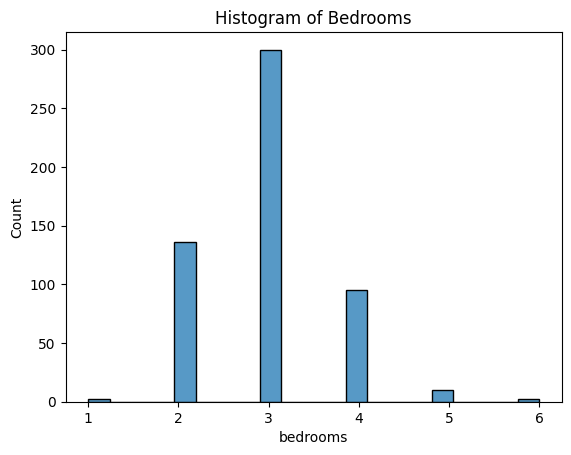

In [139]:
sns.histplot(data['bedrooms']).set(title = 'Histogram of Bedrooms')
plt.show()

Above histogram shows that, majority of the houses in the dataset have 3 bedrooms.

#### Bivariate

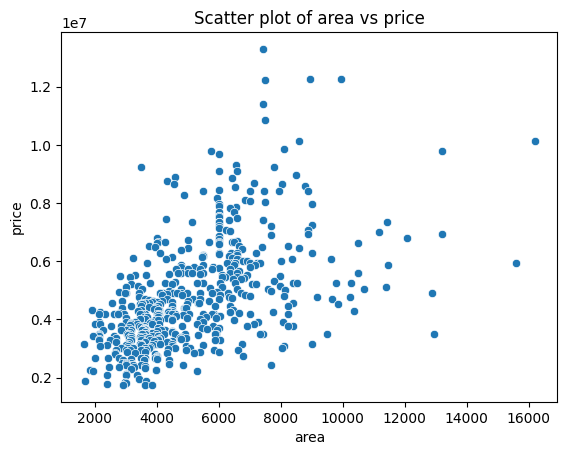

In [140]:
sns.scatterplot(x='area', y='price', data=data).set(title = 'Scatter plot of area vs price')
plt.show()

The above scatter plot shows that for majority of the observations, as the area increases, the price also increases .

#### Multivariate

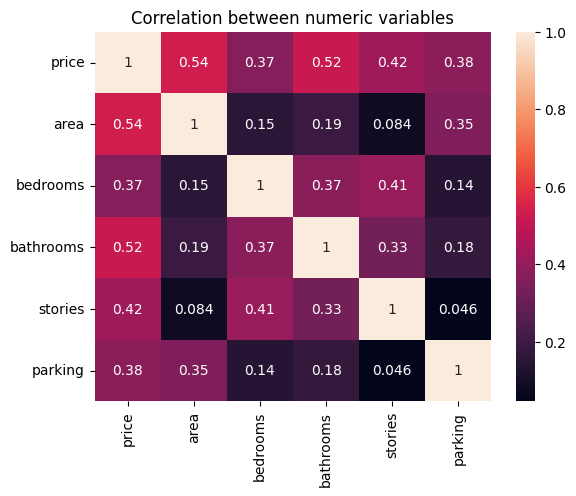

In [141]:
# Corrplot
sns.heatmap(data.corr(), annot=True).set(title = 'Correlation between numeric variables')
plt.show()

The above heatmap shows which varaibles are highly correlated with our dependent variable (price), this can be used for selecting relevant features.

### 4. Perform descriptive statistics on the dataset

In [142]:
# For numerical variables
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [143]:
# For categorical variables
data.describe(include='object')

,mainroad,guestroom,basement,hotwaterheating,airconditioning,furnishingstatus
count,545,545,545,545,545,545
unique,2,2,2,2,2,3
top,yes,no,no,no,no,semi-furnished
freq,468,448,354,520,373,227


### 5. Check for Missing values and deal with them.

In [144]:
### Finding varaibles that have missing values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64

From above, we can see that missing values are not present in the dataset, so handling is not required.

### 6. Find the outliers and replace the outliers

For price column

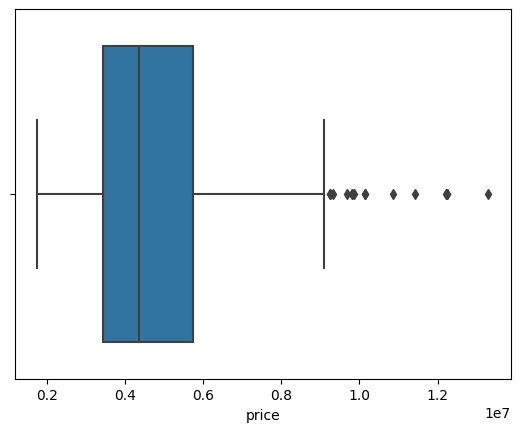

In [145]:
sns.boxplot(x = 'price', data = data)
plt.show()

In [146]:
data['price'].quantile(0.98)

9695280.0

In [147]:
# Replacing outliers in 'age' column with the 98th percentile
price_threshold = data['price'].quantile(0.98)
data.loc[data['price'] > price_threshold, 'price'] = price_threshold

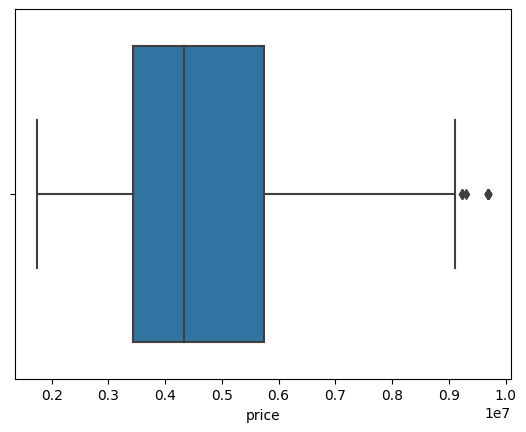

In [148]:
sns.boxplot(x = 'price', data = data)
plt.show()

### 7. Check for Categorical columns and perform encoding.

In [149]:
# Categorical classes
data.dtypes[data.dtypes == 'object']

mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
furnishingstatus    object
dtype: object

In [150]:
data['basement'].unique()

array(['no', 'yes'], dtype=object)

In [151]:
# Using label encoder for encoding above classes
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [152]:
columns = data.select_dtypes(include = 'object').columns.tolist()
columns

['mainroad',
 'guestroom',
 'basement',
 'hotwaterheating',
 'airconditioning',
 'furnishingstatus']

In [153]:
for col in columns:
    data[col] = le.fit_transform(data[col])
    
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,9695280,7420,4,2,3,1,0,0,0,1,2,0
1,9695280,8960,4,4,4,1,0,0,0,1,3,0
2,9695280,9960,3,2,2,1,0,1,0,0,2,1
3,9695280,7500,4,2,2,1,0,1,0,1,3,0
4,9695280,7420,4,1,2,1,1,1,0,1,2,0


In [154]:
data['basement'].unique()

array([0, 1])

### 8. Split the data into dependent and independent variables.

In [155]:
# Independent variables
X = data.drop('price', axis=1)
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,0
1,8960,4,4,4,1,0,0,0,1,3,0
2,9960,3,2,2,1,0,1,0,0,2,1
3,7500,4,2,2,1,0,1,0,1,3,0
4,7420,4,1,2,1,1,1,0,1,2,0


In [156]:
# Dependent variable
Y = data['price']
Y.head()

0    9695280
1    9695280
2    9695280
3    9695280
4    9695280
Name: price, dtype: int64

### 9. Scale the independent variables

In [157]:
from sklearn.preprocessing import StandardScaler

In [158]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [159]:
X[:5]

array([[ 1.04672629,  1.40341936,  1.42181174,  1.37821692,  0.40562287,
        -0.46531479, -0.73453933, -0.2192645 ,  1.4726183 ,  1.51769249,
        -1.40628573],
       [ 1.75700953,  1.40341936,  5.40580863,  2.53202371,  0.40562287,
        -0.46531479, -0.73453933, -0.2192645 ,  1.4726183 ,  2.67940935,
        -1.40628573],
       [ 2.21823241,  0.04727831,  1.42181174,  0.22441013,  0.40562287,
        -0.46531479,  1.3613975 , -0.2192645 , -0.67906259,  1.51769249,
        -0.09166185],
       [ 1.08362412,  1.40341936,  1.42181174,  0.22441013,  0.40562287,
        -0.46531479,  1.3613975 , -0.2192645 ,  1.4726183 ,  2.67940935,
        -1.40628573],
       [ 1.04672629,  1.40341936, -0.57018671,  0.22441013,  0.40562287,
         2.14908276,  1.3613975 , -0.2192645 ,  1.4726183 ,  1.51769249,
        -1.40628573]])

### 10. Split the data into training and testing

In [160]:
from sklearn.model_selection import train_test_split

In [182]:
# using a 80-20 split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [183]:
len(X_train)

408

In [184]:
len(Y_train)

408

In [185]:
len(X_test)

137

In [186]:
len(Y_test)

137

### 11. Build the Model

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
lr_model = LinearRegression()

### 12. Train the Model

In [189]:
lr_model.fit(X_train, Y_train)

LinearRegression()

### 13. Test the Model

In [190]:
# Predicted price values
Y_pred = lr_model.predict(X_test)
Y_pred[:10]

array([5635104.51647519, 4590291.94355542, 4525633.05605931,
       4243829.50522374, 4978395.73689194, 4808125.06537593,
       2636749.49229732, 4217475.03438878, 4293389.45917465,
       7181044.54439151])

In [191]:
# Actual values
Y_test[:10]

60     7140000
297    4200000
370    3640000
232    4655000
355    3773000
432    3290000
438    3255000
204    4900000
174    5250000
41     7840000
Name: price, dtype: int64

### 14. Measure the performance using Metrics.

In [192]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [193]:
r2 = r2_score(Y_pred, Y_test)
print("R sqaured is: ", r2)

R sqaured is:  0.5275115877061523


In [194]:
mse = mean_squared_error(Y_pred, Y_test)
print("Mean squared error is: ", mse)

Mean squared error is:  1114702315744.8796


Text(0, 0.5, 'Y_pred')

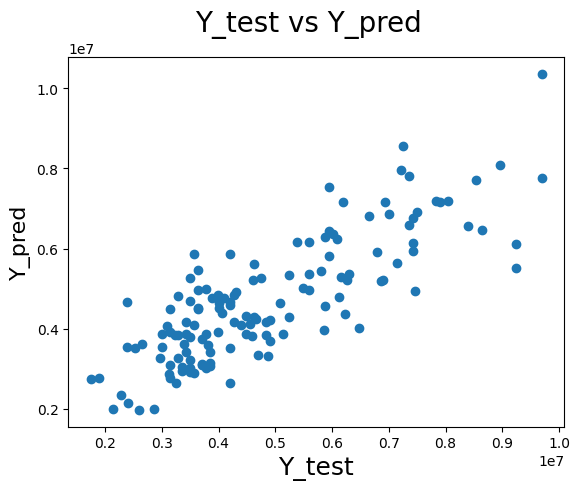

In [195]:
# Plotting Y_test and Y_pred
fig = plt.figure()
plt.scatter(Y_test,Y_pred)
fig.suptitle('Y_test vs Y_pred', fontsize=20)
plt.xlabel('Y_test', fontsize=18)                          
plt.ylabel('Y_pred', fontsize=16)                          